In [1]:
import pandas as pd
from datetime import date

df = pd.read_csv('ispark_covid19_2350.csv', sep='|')
df = df[df['empty_capacity'] >= 20]

In [2]:
hard_lockdown = [
    '2020-04-11', '2020-04-12', '2020-04-18', '2020-04-19', '2020-04-23', '2020-04-24', '2020-04-25',
    '2020-04-26', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-23', '2020-05-24', '2020-05-25',
    '2020-05-26', '2020-12-05', '2020-12-06', '2020-12-12', '2020-12-13', '2020-12-19', '2020-12-20',
    '2020-12-26', '2020-12-27', '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-09',
    '2021-01-10', '2021-01-16', '2021-01-17', '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
    '2021-02-06', '2021-02-07', '2021-02-13', '2021-02-14', '2021-02-20', '2021-02-21', '2021-02-27',
    '2021-02-28', '2021-03-06', '2021-03-07', '2021-03-13', '2021-03-14', '2021-03-20', '2021-03-21',
    '2021-03-27', '2021-03-28', '2021-04-03', '2021-04-04', '2021-04-10', '2021-04-11', '2021-04-17',
    '2021-04-18', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-30', '2021-05-01']
hard_lockdown = pd.to_datetime(hard_lockdown)

time = [0, 1, 2, 3, 4, 21, 22, 23]
weekend = [6, 7]

In [3]:
def convert_day(x):
    if x == 'Monday':
        return 1
    elif x == 'Tuesday':
        return 2
    elif x == 'Wednesday':
        return 3
    elif x == 'Thursday':
        return 4
    elif x == 'Friday':
        return 5
    elif x == 'Saturday':
        return 6
    else:
        return 7

def season(x):
    if x in [3,4,5]:
        return 1
    elif x in [6,7,8]:
        return 2
    elif x in [9,10,11]:
        return 3
    else:
        return 4

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['which_day'] = df['datetime'].apply(lambda x: x.strftime('%A'))
df['which_day'] = df['which_day'].apply(convert_day)
df['weekend'] = df['which_day'].isin(weekend)
df['weekend'] = df['weekend'].apply(lambda x: 1 if x == True else 0)
df['season'] = df['month'].apply(season)
df['hard_lockdown'] = df['date'].isin(hard_lockdown)
df['time'] = df['hour'].isin(time)
df['lockdown'] = df.apply(lambda row: 1 if row['hard_lockdown'] == True else
                                      1 if row['time'] == True and row['date'] >= date(2020, 12, 1)
                                      else 0, axis=1)
df = df[['datetime', 'empty_capacity', 'year', 'month', 'day', 'hour', 'which_day', 'weekend', 'season', 'lockdown']].sort_values('datetime')
df.dtypes

datetime          datetime64[ns]
empty_capacity             int64
year                       int64
month                      int64
day                        int64
hour                       int64
which_day                  int64
weekend                    int64
season                     int64
lockdown                   int64
dtype: object

In [5]:
df
# df.to_csv('dataframe_2350.csv', sep='|') # extract csv format

,datetime,empty_capacity,year,month,day,hour,which_day,weekend,season,lockdown
2022,2020-03-11 00:00:00,154,2020,3,11,0,3,0,1,0
4269,2020-03-11 01:00:00,152,2020,3,11,1,3,0,1,0
8286,2020-03-11 02:00:00,152,2020,3,11,2,3,0,1,0
1990,2020-03-11 03:00:00,151,2020,3,11,3,3,0,1,0
9311,2020-03-11 04:00:00,152,2020,3,11,4,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3602,2021-05-01 15:00:00,121,2021,5,1,15,6,1,1,1
5008,2021-05-01 16:00:00,120,2021,5,1,16,6,1,1,1
7830,2021-05-01 17:00:00,118,2021,5,1,17,6,1,1,1
7269,2021-05-01 18:00:00,115,2021,5,1,18,6,1,1,1


In [6]:
df.set_index(['datetime'], inplace=True)

In [7]:
X = df
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#TRAIN
sarimax_model= SARIMAX(train['empty_capacity'], exog=train.drop(["empty_capacity"], axis=1),
                       order=(0, 0, 5), seasonal_order=(2, 0, 2, 12))

C:\Users\gokceyuksel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gokceyuksel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [9]:
sarimax_model = sarimax_model.fit(disp=False, max_iter=50, method='powell')

C:\Users\gokceyuksel\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
mdl_summary = sarimax_model.summary()

In [11]:
train_preds = sarimax_model.predict(exog=train.drop(["empty_capacity"],axis=1))

In [12]:
train = pd.DataFrame(train)
train["train_preds"] = train_preds
train
# train.to_csv('train_dataframe_2350.csv', sep='|')

,empty_capacity,year,month,day,hour,which_day,weekend,season,lockdown,train_preds
datetime,,,,,,,,,,
2020-03-11 00:00:00,154,2020,3,11,0,3,0,1,0,165.753381
2020-03-11 01:00:00,152,2020,3,11,1,3,0,1,0,155.480514
2020-03-11 02:00:00,152,2020,3,11,2,3,0,1,0,153.406907
2020-03-11 03:00:00,151,2020,3,11,3,3,0,1,0,154.660973
2020-03-11 04:00:00,152,2020,3,11,4,3,0,1,0,153.002279
...,...,...,...,...,...,...,...,...,...,...
2020-12-07 11:00:00,213,2020,12,7,11,1,0,4,0,200.308928
2020-12-07 12:00:00,220,2020,12,7,12,1,0,4,0,208.311517
2020-12-07 13:00:00,229,2020,12,7,13,1,0,4,0,207.807496


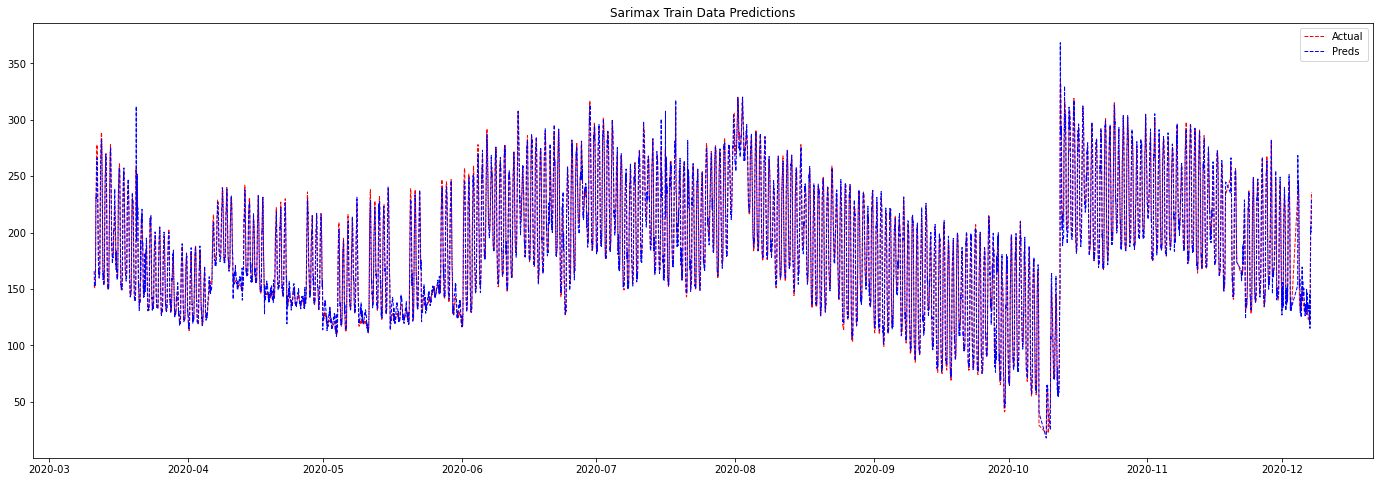

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
plt.plot(train["empty_capacity"], "r--", linewidth=1)
plt.plot(train["train_preds"], "b--", linewidth=1)
plt.legend(("Actual","Preds"))
plt.title("Sarimax Train Data Predictions")
plt.show()

In [14]:
# TEST
start = len(train)
end = len(df) - 1 
test_preds = sarimax_model.predict(start=start, end=end, typ="levels",exog=test.drop(["empty_capacity"],axis=1))
test["test_preds"] = test_preds.values

C:\Users\gokceyuksel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-14-0de7b303d205>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test_preds"] = test_preds.values


In [15]:
test = pd.DataFrame(test)
test
# test.to_csv('test_dataframe_2350.csv', sep='|')

,empty_capacity,year,month,day,hour,which_day,weekend,season,lockdown,test_preds
datetime,,,,,,,,,,
2020-12-07 16:00:00,232,2020,12,7,16,1,0,4,0,233.373094
2020-12-07 17:00:00,220,2020,12,7,17,1,0,4,0,217.180395
2020-12-07 18:00:00,200,2020,12,7,18,1,0,4,0,203.099340
2020-12-07 19:00:00,171,2020,12,7,19,1,0,4,0,193.865923
2020-12-07 20:00:00,146,2020,12,7,20,1,0,4,0,192.963043
...,...,...,...,...,...,...,...,...,...,...
2021-05-01 15:00:00,121,2021,5,1,15,6,1,1,1,160.408625
2021-05-01 16:00:00,120,2021,5,1,16,6,1,1,1,163.027232
2021-05-01 17:00:00,118,2021,5,1,17,6,1,1,1,166.314221


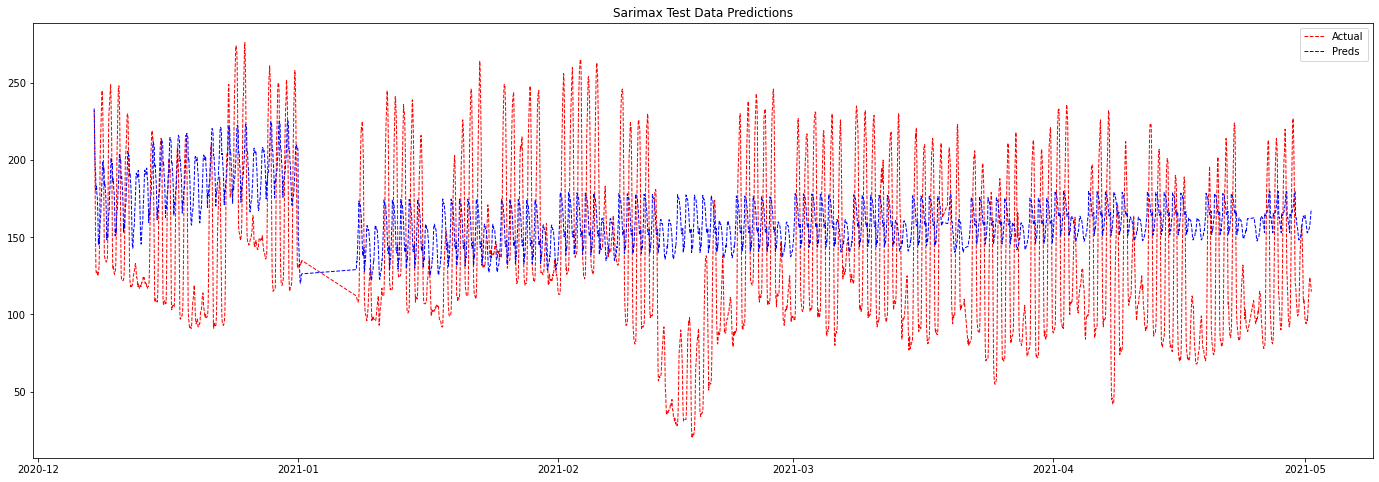

In [16]:
plt.figure(figsize=(24, 8))
plt.plot(test["empty_capacity"], "r--", linewidth=1)
plt.plot(test["test_preds"], "b--", linewidth=1)
plt.legend(("Actual","Preds"))
plt.title("Sarimax Test Data Predictions")
plt.show()

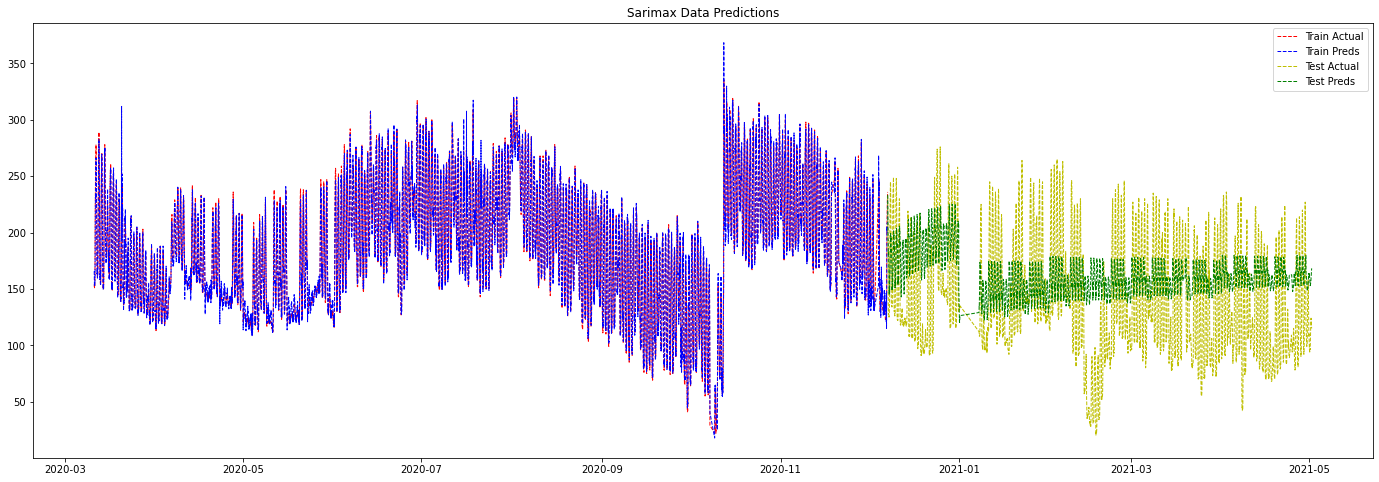

In [17]:
plt.figure(figsize=(24, 8))
plt.plot(train["empty_capacity"], "r--", linewidth=1)
plt.plot(train["train_preds"], "b--", linewidth=1)
plt.plot(test["empty_capacity"], "y--", linewidth=1)
plt.plot(test["test_preds"], "g--", linewidth=1)
plt.legend(("Train Actual","Train Preds","Test Actual","Test Preds"))
plt.title("Sarimax Data Predictions")
plt.show()